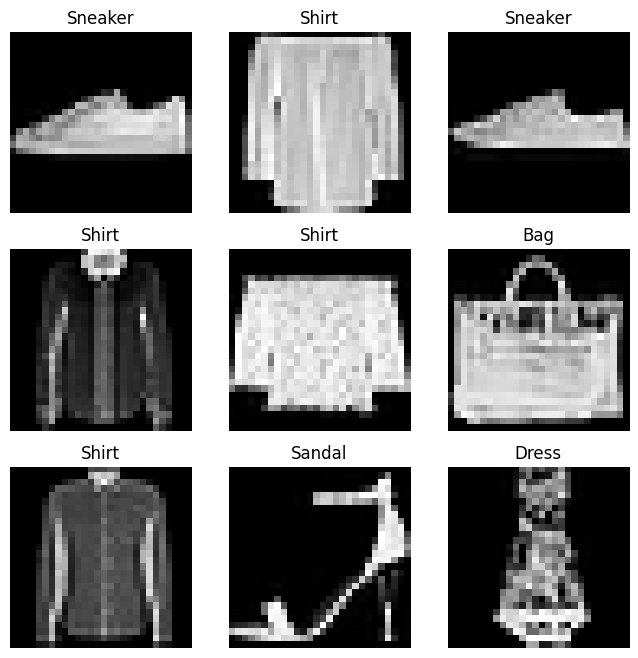

In [1]:
import torch
####1.张量较好理解，暂不用代码解析，可看作数组Numpy
import numpy as np

####2.数据集和数据加载器
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
#存储训练和测试数据，并变换成张量
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() #随机取出一张图片，并获得图片id
    img, label = training_data[sample_idx] #数据收集，img存训练数据张量，label存其对应的标签如trouser对应1
    figure.add_subplot(rows, cols, i) #将figure划分为3*3网络，并在指定格子创建Axes，之后可在此axes中绘制图形
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") #将img张量的值以图片展示，cmap热图
plt.show()

In [2]:
import os
import pandas as pd
from torchvision.io import read_image
class CustomImageDataset(Dataset):
    #初始化目录含图像、注释文件和转换
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    #返回数据集中的样本数
    def __len__(self):
        return len(self.img_labels)
    #按照索引从数据集中返回样本
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) #iloc取第idx行第0列数据，即图片
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label #得到索引处的图像和标签

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


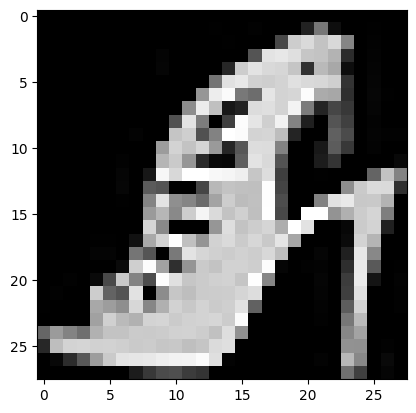

Label: 5


In [3]:
from torch.utils.data import DataLoader
#DataLoader一次取batch_size数量的照片，并获得同等数量的标签
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
# Display image and label.
train_features, train_labels = next(iter(train_dataloader)) #每次load 64张图片
print(f"Feature batch shape: {train_features.size()}") #64张图片，1通道，28*28尺寸
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
#DataLoader相当于小批量处理，迭代遍历后洗牌重新训练